# SEM image fitting

In [1]:
using SEMFitting
using Images
import DataFrames

    .>(AbstractArray{Bool, N<:Any}, Union{DataArrays.PooledDataArray{Bool, R<:Integer, N<:Any}, DataArrays.DataArray{Bool, N<:Any}}) at /Users/ajkeller/.julia/v0.4/DataArrays/src/broadcast.jl:330
is ambiguous with: 
    .>(Images.AbstractImageDirect, AbstractArray) at /Users/ajkeller/.julia/v0.4/Images/src/algorithms.jl:179.
To fix, define 
    .>(Images.AbstractImageDirect{Bool, N<:Any}, Union{DataArrays.PooledDataArray{Bool, R<:Integer, N<:Any}, DataArrays.DataArray{Bool, N<:Any}})
before the new definition.
    .>(AbstractArray, Union{DataArrays.PooledDataArray, DataArrays.DataArray}) at /Users/ajkeller/.julia/v0.4/DataArrays/src/broadcast.jl:285
is ambiguous with: 
    .>(Images.AbstractImageDirect, AbstractArray) at /Users/ajkeller/.julia/v0.4/Images/src/algorithms.jl:179.
To fix, define 
    .>(Images.AbstractImageDirect, Union{DataArrays.PooledDataArray, DataArrays.DataArray})
before the new definition.
    -(DataArrays.DataArray, AbstractArray) at /Users/ajkeller/.julia/v0.4/Da

## Method

We first obtain an approximate physical scale, assumed to be the same for x and y, by looking at the scale bar of the image and specifying what length it corresponds to. At the moment we have not implemented any rotation compensation, and the scale is assumed to be the same in the horizontal and vertical directions: tilting is not considered.

We then specify a threshold and feature size range (in area units) to isolate the holes in the picture of the ground plane.

Following this we take the centroids of each hole, and specifying the number of rows and columns, use k-means clustering to give us mean row and column positions. (At this step you could consider trying to fit the centroids within each cluster to determine rotation angles, but we don't yet.)

We take vertical and horizontal cuts at each row and column, looking for contiguous lengths of 0 or 1 in the binary thresholded image (with some minimum feature size to account for noise). We take all but the first and last length since these will typically be cut off in the image boundary.

If the number of resulting lengths is odd, we drop the last one. This is convenient for setting an absolute scale in the vertical and horizontal directions based on the design spacing between holes. With an even number of lengths of 0 or 1, we are sure we have an integer number of "unit cells", and can determine the physical length per unit cell.

Using the absolute scale, we then find the average hole size in the x and y direction and average trace width in the x and y direction, based on the horizontal and vertical cuts we took.

## Chip 2-10

#### Load the image

 in checked_import at /Users/ajkeller/.julia/v0.4/FileIO/src/loadsave.jl:12
 in load at /Users/ajkeller/.julia/v0.4/FileIO/src/loadsave.jl:79
 in load at /Users/ajkeller/.julia/v0.4/FileIO/src/loadsave.jl:42
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/ajkeller/.julia/v0.4/IJulia/src/execute_request.jl:182
 in eventloop at /Users/ajkeller/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
Trying next loading library! Please report this issue on the Github page for QuartzImageIO


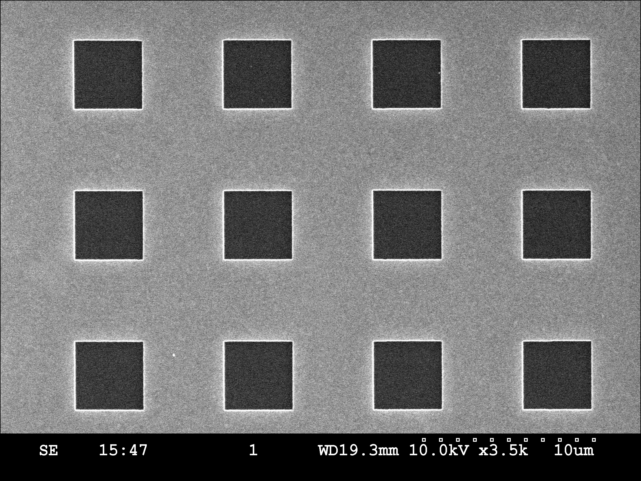

In [2]:
img10 = load(joinpath(Pkg.dir("SEMFitting"),"examples","chip10_groundplane.bmp"))

#### Thresholding and feature isolation

 in checked_import at /Users/ajkeller/.julia/v0.4/FileIO/src/loadsave.jl:12
 in save at /Users/ajkeller/.julia/v0.4/FileIO/src/loadsave.jl:94
 in writemime at /Users/ajkeller/.julia/v0.4/Images/src/writemime.jl:30
 in base64encode at base64.jl:160
 in display_dict at /Users/ajkeller/.julia/v0.4/IJulia/src/execute_request.jl:32
 in execute_request_0x535c5df2 at /Users/ajkeller/.julia/v0.4/IJulia/src/execute_request.jl:213
 in eventloop at /Users/ajkeller/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
Trying next loading library! Please report this issue on the Github page for QuartzImageIO


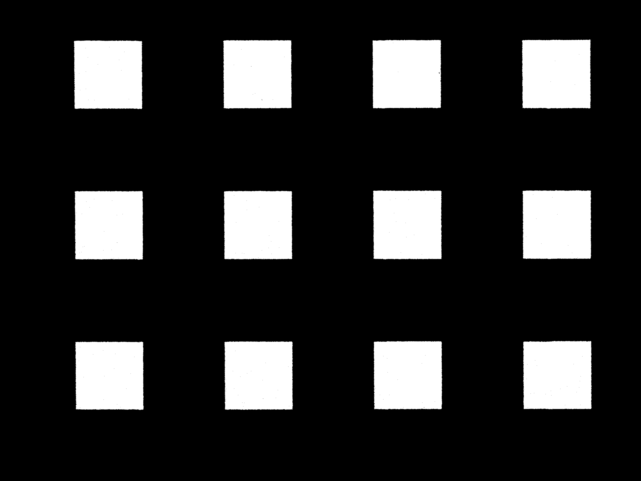

 in checked_import at /Users/ajkeller/.julia/v0.4/FileIO/src/loadsave.jl:12
 in save at /Users/ajkeller/.julia/v0.4/FileIO/src/loadsave.jl:94
 in writemime at /Users/ajkeller/.julia/v0.4/Images/src/writemime.jl:30
 in base64encode at base64.jl:160
 in display_dict at /Users/ajkeller/.julia/v0.4/IJulia/src/execute_request.jl:32
 in execute_request_0x535c5df2 at /Users/ajkeller/.julia/v0.4/IJulia/src/execute_request.jl:213
 in eventloop at /Users/ajkeller/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
Trying next loading library! Please report this issue on the Github page for QuartzImageIO


In [3]:
im10, df10 = SEMFitting.sizerange(img10, 10, 13, 20, thresh=0.6)
im10

#### K-means clustering

In [4]:
SEMFitting.colrow(df10, 4, 3)

([6.255216906150867,14.854353657929014,23.460170804370655,32.07918668585452],[4.258439984543297,12.943409493594235,21.61468662156667])

#### Hole and trace width within all rows

In [5]:
gprows10 = SEMFitting.groundplane(im10, SEMFitting.colrow(df10, 4, 3)[2], 2, 8.0, 0.5)

3-element Array{Array{Int64,1},1}:
 [269,326,271,327,272,325]
 [271,326,269,328,270,328]
 [270,327,270,326,272,326]

6x3 Array{Float64,2}:
 3.60469  3.63149  3.61809
 4.36851  4.36851  4.38191
 3.63149  3.60469  3.61809
 4.38191  4.39531  4.36851
 3.64489  3.61809  3.64489
 4.35511  4.39531  4.36851

#### Hole and trace width within all columns

In [6]:
gpcols10 = SEMFitting.groundplane(im10, SEMFitting.colrow(df10, 4, 3)[1], 1, 8.0, 0.5)

4-element Array{Array{Int64,1},1}:
 [270,331,272,331]
 [272,331,272,331]
 [272,330,274,330]
 [275,328,273,329]

4x4 Array{Float64,2}:
 3.58432  3.61087  3.61087  3.65069
 4.39411  4.39411  4.38083  4.35428
 3.61087  3.61087  3.63742  3.62414
 4.39411  4.39411  4.38083  4.36756

### Below result: average hole size in x-direction, y-direction; average trace width in x-direction, y-direction (µm)

In [7]:
mxho10 = mean(gprows10[1:2:end,:])
myho10 = mean(gpcols10[1:2:end,:])
mxtr10 = mean(gprows10[2:2:end,:])
mytr10 = mean(gpcols10[2:2:end,:])
(mxho10, myho10, mxtr10, mytr10)

(3.6240461567094733,3.617506741339971,4.375953843290526,4.38249325866003)

## Chip 2-12

#### Load the image

 in checked_import at /Users/ajkeller/.julia/v0.4/FileIO/src/loadsave.jl:12
 in load at /Users/ajkeller/.julia/v0.4/FileIO/src/loadsave.jl:79
 in load at /Users/ajkeller/.julia/v0.4/FileIO/src/loadsave.jl:42
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/ajkeller/.julia/v0.4/IJulia/src/execute_request.jl:182
 in eventloop at /Users/ajkeller/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
Trying next loading library! Please report this issue on the Github page for QuartzImageIO


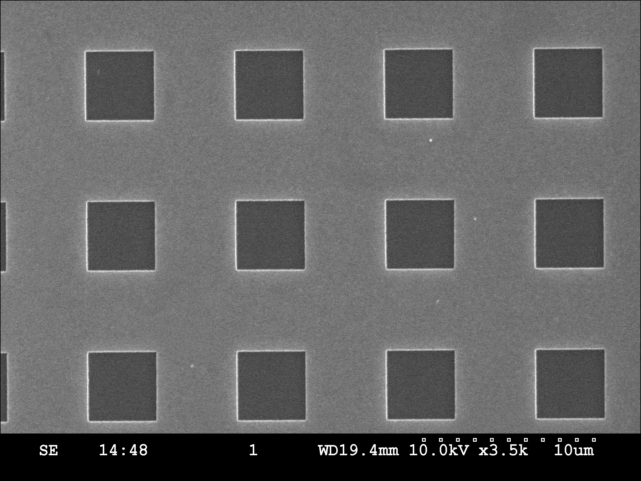

 in checked_import at /Users/ajkeller/.julia/v0.4/FileIO/src/loadsave.jl:12
 in save at /Users/ajkeller/.julia/v0.4/FileIO/src/loadsave.jl:94
 in writemime at /Users/ajkeller/.julia/v0.4/Images/src/writemime.jl:30
 in base64encode at base64.jl:160
 in display_dict at /Users/ajkeller/.julia/v0.4/IJulia/src/execute_request.jl:32
 in execute_request_0x535c5df2 at /Users/ajkeller/.julia/v0.4/IJulia/src/execute_request.jl:213
 in eventloop at /Users/ajkeller/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
Trying next loading library! Please report this issue on the Github page for QuartzImageIO


In [8]:
img12 = load(joinpath(Pkg.dir("SEMFitting"),"examples","chip12_groundplane.bmp"))

#### Thresholding and feature isolation

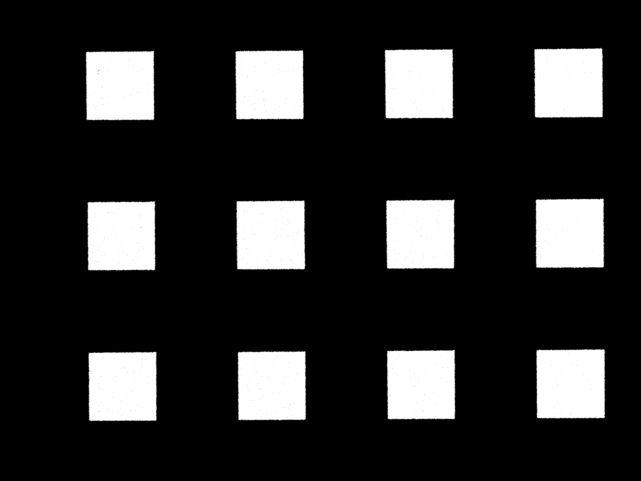

 in checked_import at /Users/ajkeller/.julia/v0.4/FileIO/src/loadsave.jl:12
 in save at /Users/ajkeller/.julia/v0.4/FileIO/src/loadsave.jl:94
 in writemime at /Users/ajkeller/.julia/v0.4/Images/src/writemime.jl:30
 in base64encode at base64.jl:160
 in display_dict at /Users/ajkeller/.julia/v0.4/IJulia/src/execute_request.jl:32
 in execute_request_0x535c5df2 at /Users/ajkeller/.julia/v0.4/IJulia/src/execute_request.jl:213
 in eventloop at /Users/ajkeller/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
Trying next loading library! Please report this issue on the Github page for QuartzImageIO


In [9]:
im12, df12 = SEMFitting.sizerange(img12, 10, 12, 200, thresh=0.49)
im12

#### K-means clustering

In [10]:
SEMFitting.colrow(df12, 4, 3)

([6.978730174070673,15.58521369822441,24.20011910267778,32.81946409145323],[4.843325480229821,13.506001788397892,22.183771653919795])

#### Hole and trace width within all rows

In [11]:
gprows12 = SEMFitting.groundplane(im12, SEMFitting.colrow(df12, 4, 3)[2], 2, 8.0, 1.5)

3-element Array{Array{Int64,1},1}:
 [244,354,269,329,269,328]
 [269,328,270,328,272,326]
 [272,326,270,325,272,328]

6x3 Array{Float64,2}:
 3.26603  3.60067  3.64083
 4.73843  4.39041  4.36364
 3.60067  3.61405  3.61405
 4.40379  4.39041  4.35025
 3.60067  3.64083  3.64083
 4.39041  4.36364  4.39041

#### Hole and trace width within all columns

In [12]:
gpcols12 = SEMFitting.groundplane(im12, SEMFitting.colrow(df12, 4, 3)[1], 1, 8.0, 0.5)

4-element Array{Array{Int64,1},1}:
 [273,327,274,329]
 [273,328,271,331]
 [275,329,272,330]
 [273,329,273,329]

4x4 Array{Float64,2}:
 3.62791  3.62791  3.65449  3.62791
 4.34551  4.3588   4.37209  4.37209
 3.6412   3.60133  3.61462  3.62791
 4.37209  4.39867  4.38538  4.37209

### Below result: average hole size in x-direction, y-direction; average trace width in x-direction, y-direction (µm)

In [13]:
mxho12 = mean(gprows12[1:2:end,:])
myho12 = mean(gpcols12[1:2:end,:])
mxtr12 = mean(gprows12[2:2:end,:])
mytr12 = mean(gpcols12[2:2:end,:])
(mxho12, myho12, mxtr12, mytr12)

(3.579847555307678,3.627906976744186,4.420152444692323,4.372093023255814)